<a href="https://colab.research.google.com/github/giacomoortona/CMSDASWidth/blob/master/Aria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and files

In [0]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#import matplotlib.pylab as pl
import matplotlib.cm as cm
import datetime
import scipy
import matplotlib.dates as mdates

In [57]:
url = 'https://raw.githubusercontent.com/giacomoortona/Colab_Aria/master/full_1920_10.csv?token=ABJ5XDKFCLKSJ3WITTLV2GK6PYMUG'
df10 = pd.read_csv(url,sep=';')
url = 'https://raw.githubusercontent.com/giacomoortona/Colab_Aria/master/full_1920_25.csv?token=ABJ5XDKFCLKSJ3WITTLV2GK6PYMUG'
df25 = pd.read_csv(url,sep=';')
#df25.head()
#df25.keys()
#df10.head()
pd.to_datetime(df10['date'],format='%d/%m/%Y')
pd.to_datetime(df25['date'],format='%d/%m/%Y')
df25.keys()

Index(['date', 'value'], dtype='object')

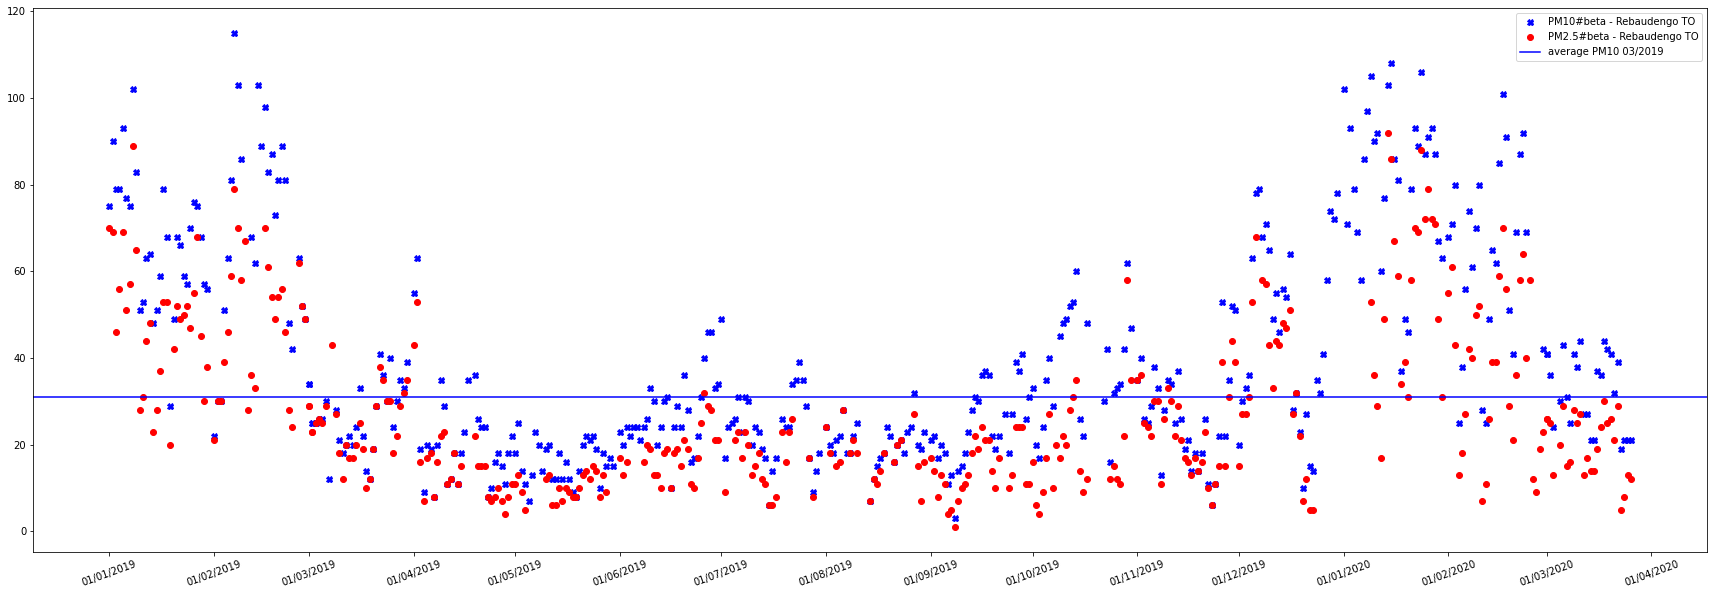

In [105]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
#plt.locator_params(axis='x', nbins=10)
#fig, ax = plt.subplots()
#print ('a')
#plt.rcParams['figure.figsize'] = [30, 10]
plt.xticks(rotation=20)

plt.plot(pd.to_datetime(df10.date,format="%d/%m/%Y"), df10.value, 'bX', markevery=True, label="PM10#beta - Rebaudengo TO")
plt.plot(pd.to_datetime(df25.date,format="%d/%m/%Y"), df25.value, 'ro', markevery=True, label="PM2.5#beta - Rebaudengo TO")
#every_nth = 7
#for n, label in enumerate(ax.xaxis.get_ticklabels()):
#    if n % every_nth != 0:
#        label.set_visible(False)
#print ("A")
times = pd.date_range('2019-01-01', '2020-04-01')
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%d/%m/%Y')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

#plt.xticks(times.to_pydatetime())
#plt.locator_params(axis='x', nbins=16)
#plt.xticks(rotation=20)

#plt.show()
#plt.axvline(pd.to_datetime("25/03/2019",format="%d/%m/%Y"), 0, 0.5, label='25/03/2019',c='orange')
#plt.axhline(31,pd.to_datetime("01/03/2019",format="%d/%m/%Y"), pd.to_datetime("25/03/2020",format="%d/%m/%Y"), label='horizontal')
plt.axhline(31,0,1, label='average PM10 03/2019',c='b')
#plt.show()
plt.legend()